#### Fast Newton Polynomial (2D)

In [1]:
import time
import numpy as np
import nexpy as nxp
import minterpy as mp
import matplotlib.pyplot as plt

In [2]:
# SECTION : SUBSECTION
    # (markdown introduction)
    # METHODS : DESCRIPTION
    # PARAMETERS : DESCRIPTION
    # COMPUTATIONS : DESCRIPTION
    # OUTPUTS : DESCRIPTION

#### FNP (2D) : Interpolation

In [17]:
# Methods

def runge_function(x):
    
    return 1 / (1 + 25*(x[:,0]**2 + x[:,1]**2))

In [18]:
# Parameters

points_x = points_y = 150

spatial_dimension = 2
poly_degree = 210
p_degree = 2.0

x, y = np.linspace(-1, 1, points_x), np.linspace(-1, 1, points_y)
grid = np.flip(mp.utils.cartesian_product(y, x), axis=1)

In [19]:
# Computations: Construction

start1 = time.time()

fnp = nxp.FastNewtonPolynomial(
    spatial_dimension = spatial_dimension,
    poly_degree = poly_degree,
    p_degree = p_degree)

end1 = time.time()

In [20]:
# Computations: Interpolation

start2 = time.time()

fnp.interpolate(func = runge_function)

end2 = time.time()

In [21]:
# Computations : Runtime

runtime_c = np.round((end1-start1) * 10e5) / 10e2
runtime_i = np.round((end2-start2) * 10e5) / 10e2

In [22]:
# Outputs : Runtime

print(f"Construction time = {runtime_c}ms")
print(f"Interpolation time = {runtime_i}ms")

Construction time = 35.314ms
Interpolation time = 76.567ms


#### FNP (2D) : Evaluation

In [23]:
# Computations : Evaluation of the runge function

# ground truth
gt = runge_function(grid).reshape(points_x, points_y) 

In [24]:
# Computations : Evaluation via minterpy

start3 = time.time()

fnp_eval = fnp(grid).reshape(points_x, points_y)

end3 = time.time()

In [25]:
# Computations : Runtime

runtime_e = np.round((end3-start3)*10e5)/10e2

In [26]:
# Computations : Relative MSRE, relative MRE amd the AOC

rel_eps = np.abs(((fnp_eval-gt)/gt).reshape(-1))

msre = np.mean(rel_eps**2)

mre = np.max(rel_eps)

aoc = len(fnp.coeffs)

In [27]:
# Outputs : Runtime

print(f"Evaluation time = {runtime_e}ms")

Evaluation time = 12071.118ms


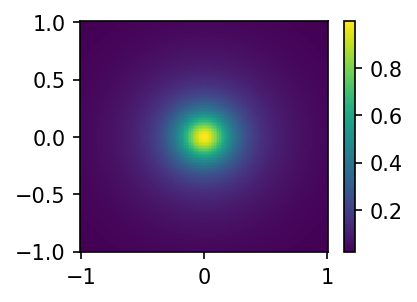

In [28]:
# Outputs : Original runge function (ground truth)

fig, ax = plt.subplots(1, 1, figsize=(8/3, 2), dpi=150)
im = ax.pcolormesh(x, y, gt)
fig.colorbar(im, ax=ax)
plt.show()

Text(0.5, 1.0, 'Relative Error')

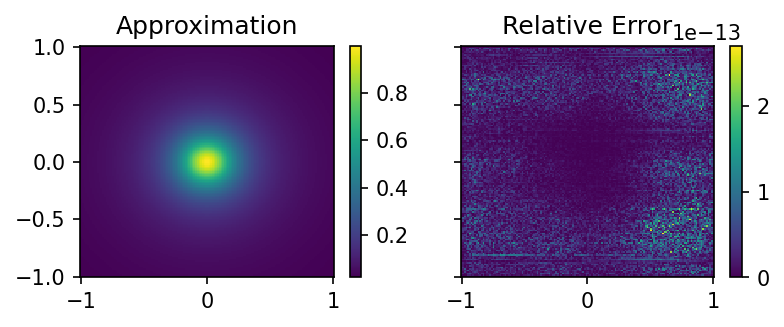

In [29]:
# Outputs : Approximation and relative error

fig, axs = plt.subplots(1, 2, figsize=(6, 2), sharex=True, sharey=True, gridspec_kw={'hspace': 0.6}, dpi=150)

im = axs[0].pcolormesh(x, y, fnp_eval)
fig.colorbar(im, ax=axs[0])
axs[0].set_title('Approximation', fontsize = 12)

im = axs[1].pcolormesh(x, y, np.abs((fnp_eval - gt) / gt))
fig.colorbar(im, ax=axs[1])
axs[1].set_title('Relative Error', fontsize = 12)

In [30]:
# Outputs : Relative MSRE, relative MRE and the AOC

print(f'Mean Squared Relative Error = {msre}')
print(f'Maximal Relative Error = {mre}')
print(f'Amount of Coefficients = {aoc}')

Mean Squared Relative Error = 1.4197852529638394e-27
Maximal Relative Error = 2.6900485227590237e-13
Amount of Coefficients = 34837
